[Reference](https://medium.com/analytics-vidhya/anomaly-detection-in-python-part-1-basics-code-and-standard-algorithms-37d022cdbcff)

In [1]:
def tukey(x, k = 1.5):
    x = np.array(x).copy().astype(float)
    first_quartile = np.quantile(x, .25)
    third_quartile = np.quantile(x, .75)
    
    # Define IQR
    iqr = third_quartile - first_quartile
    
    ### Define the allowed limits for 'Normal Data'
    lower_allowed_limit = first_quartile - (k * iqr)
    upper_allowed_limit = third_quartile + (k * iqr)
    
    #set values below the lower limit/above the upper limit as nan
    x[(x<lower_allowed_limit) | (x>upper_allowed_limit)] = np.nan
    return x

In [10]:
import numpy as np
import pandas as pd
from sklearn import covariance
import matplotlib.pyplot as plt

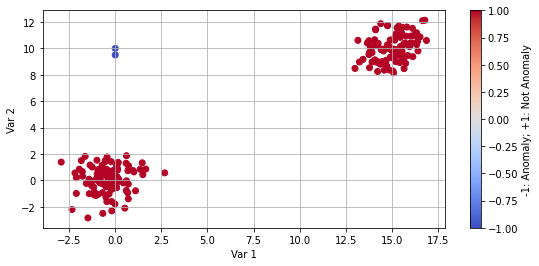

In [11]:
### Create the Data
d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]),
                               cov = np.array([[1, 0], [0, 1]]), size = 100)

d2 = np.random.multivariate_normal(mean = np.array([15, 10]),
                               cov = np.array([[1, 0.3], [.3, 1]]), size = 100)

outliers = np.array([[0, 10],[0, 9.5]])
d = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var 1', 'Var 2'])

### The outliers added above are what we want to detect ####
############# Use Mahalanobis distance method to detect them ##### Define the Elliptic Envelope
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.0075, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit(d)

# Create column that shows anomaly status
d['Anomaly or Not'] = el.predict(d)

# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(d['Var 1'], d['Var 2'], c = d['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()